##### Autism Prediction, Juan Garcia, CISA 4358: 001, Senior Project and Seminar, Fall 2022 ##### 

### Modules

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
import warnings
from sklearn.feature_selection import chi2

### Import CSV

In [306]:
autism_df = pd.read_csv("train.csv")
autism_df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [307]:
print(autism_df.shape)

(800, 22)


### Unique Values

In [308]:
for columns in autism_df.select_dtypes('O').columns:
    print(f'Column name: {columns}\n')
    print(f'Unique values:\n{autism_df[columns].unique()}\n\n')

Column name: gender

Unique values:
['f' 'm']


Column name: ethnicity

Unique values:
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


Column name: jaundice

Unique values:
['no' 'yes']


Column name: austim

Unique values:
['no' 'yes']


Column name: contry_of_res

Unique values:
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']


Column n

### Combining Like Terms

In [309]:
autism_df['ethnicity'] = autism_df['ethnicity'].replace('?', 'Others')
autism_df['ethnicity'] = autism_df['ethnicity'].replace('others', 'Others')
autism_df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

### Dropping Unused Columns

In [310]:
autism_df = autism_df.drop({"ID","age_desc","used_app_before","relation"}, axis = 1)
autism_df.ethnicity.fillna("Unknown", inplace = True)

autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0


### Null Values

In [311]:
print(autism_df.isnull().sum(axis = 0))

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
Class/ASD        0
dtype: int64


### Value Counts Attributes

In [312]:
count1 = autism_df['contry_of_res'].value_counts()
count2 = autism_df['jaundice'].value_counts()
count3 = autism_df['ethnicity'].value_counts()
count4 = autism_df['gender'].value_counts()
count5 = autism_df['austim'].value_counts()
count6 = autism_df['Class/ASD'].value_counts()
print('_________________')
print(count1)
print('_________________')
print(count2)
print('_________________')
print(count3)
print('_________________')
print(count4)
print('_________________')
print(count5)
print('_________________')
print(count6)

_________________
contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia         

### ASD Distribution per Countries

In [313]:
country_df = pd.DataFrame(count1)
country_df.reset_index(inplace=True)
country_df.rename(columns = {'contry_of_res':'country','index':'count'}, inplace = True)
country_df

,country,count
0,United States,134
1,India,108
2,New Zealand,78
3,United Kingdom,67
4,Jordan,55
5,United Arab Emirates,40
6,Australia,37
7,Canada,30
8,Afghanistan,22
9,Netherlands,20


<Axes: xlabel='country'>

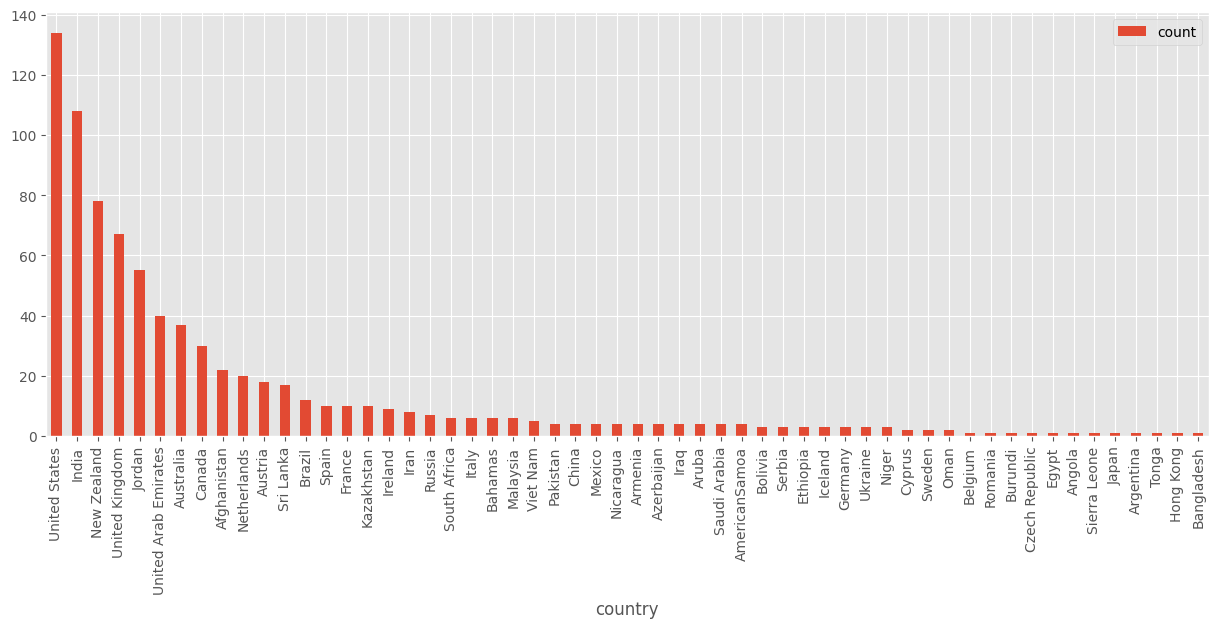

In [314]:
plt.rcParams["figure.figsize"] = (15,5.5)
country_df.plot.bar('country', 'count')

### Counting the Total Raw Score

In [315]:
count1 = autism_df['A1_Score'].value_counts()
print(count1)
count2 = autism_df['A2_Score'].value_counts()
print(count2)
count3 = autism_df['A3_Score'].value_counts()
print(count3)
count4 = autism_df['A4_Score'].value_counts()
print(count4)
count5 = autism_df['A5_Score'].value_counts()
print(count5)
count6 = autism_df['A6_Score'].value_counts()
print(count6)
count7 = autism_df['A7_Score'].value_counts()
print(count7)
count8 = autism_df['A8_Score'].value_counts()
print(count8)
count9 = autism_df['A9_Score'].value_counts()
print(count9)
count10 = autism_df['A10_Score'].value_counts()
print(count10)

A1_Score
1    448
0    352
Name: count, dtype: int64
A2_Score
1    424
0    376
Name: count, dtype: int64
A3_Score
0    440
1    360
Name: count, dtype: int64
A4_Score
0    468
1    332
Name: count, dtype: int64
A5_Score
0    484
1    316
Name: count, dtype: int64
A6_Score
0    557
1    243
Name: count, dtype: int64
A7_Score
0    482
1    318
Name: count, dtype: int64
A8_Score
1    407
0    393
Name: count, dtype: int64
A9_Score
0    404
1    396
Name: count, dtype: int64
A10_Score
1    494
0    306
Name: count, dtype: int64


In [316]:
scores_df = autism_df[['A1_Score',
               'A2_Score',
               'A3_Score',
               'A4_Score',
               'A5_Score',
               'A6_Score',
               'A7_Score',
               'A8_Score',
               'A9_Score',
               'A10_Score']]
scores_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,0,1,0,1,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


### Correlation in the Scores DF

In [317]:
scores_df.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
A1_Score,1.000000,0.401419,0.493016,0.383718,0.432912,0.371917,0.447262,0.191815,0.439397,0.390478
A2_Score,0.401419,1.000000,0.489330,0.488173,0.427895,0.447721,0.452713,0.302040,0.511547,0.454422
A3_Score,0.493016,0.489330,1.000000,0.558896,0.579769,0.511669,0.559118,0.315882,0.597022,0.510276
A4_Score,0.383718,0.488173,0.558896,1.000000,0.559748,0.563543,0.554838,0.360781,0.576723,0.506292
A5_Score,0.432912,0.427895,0.579769,0.559748,1.000000,0.494944,0.550663,0.292747,0.524624,0.436010
A6_Score,0.371917,0.447721,0.511669,0.563543,0.494944,1.000000,0.496588,0.333694,0.536666,0.419172
A7_Score,0.447262,0.452713,0.559118,0.554838,0.550663,0.496588,1.000000,0.271903,0.539433,0.455326
A8_Score,0.191815,0.302040,0.315882,0.360781,0.292747,0.333694,0.271903,1.000000,0.352747,0.250438
A9_Score,0.439397,0.511547,0.597022,0.576723,0.524624,0.536666,0.539433,0.352747,1.000000,0.485983
A10_Score,0.390478,0.454422,0.510276,0.506292,0.436010,0.419172,0.455326,0.250438,0.485983,1.000000


<Axes: >

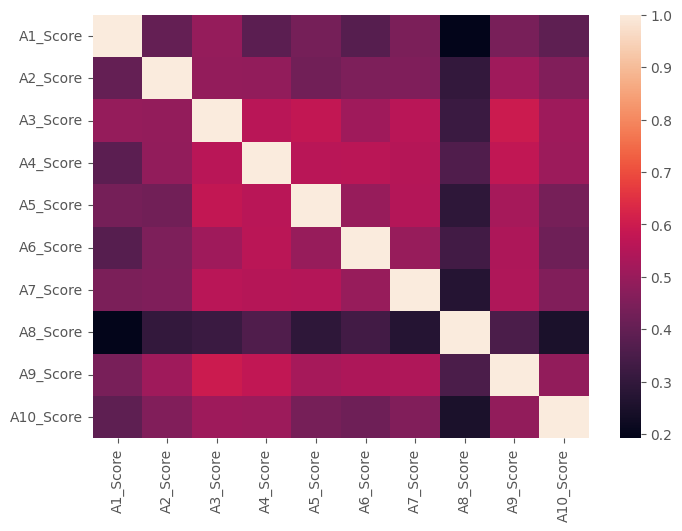

In [318]:
plt.rcParams["figure.figsize"] = (8,5.5)
sns.heatmap(scores_df.corr())


In [319]:
print(scores_df.isnull().sum(axis = 0))

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
dtype: int64


In [320]:
scores_df.dtypes

A1_Score     int64
A2_Score     int64
A3_Score     int64
A4_Score     int64
A5_Score     int64
A6_Score     int64
A7_Score     int64
A8_Score     int64
A9_Score     int64
A10_Score    int64
dtype: object

### Adding up the scores

In [321]:
sum_score = pd.DataFrame(columns=['raw_score'])
sums = []

for index in range(len(scores_df.index)):
    row = scores_df.iloc[[index]]

    sum = int(row['A1_Score'])+ int(row['A2_Score'])+ int(row['A3_Score'])+ int(row['A4_Score'])+ int(row['A5_Score'])+ int(row['A6_Score'])+ int(row['A7_Score'])+ int(row['A8_Score'])+ int(row['A9_Score'])+ int(row['A10_Score'])
    sums.append(sum)

    sum_score.loc[index] = [sum]

In [322]:
#adding the raw score to df
autism_new = pd.concat([autism_df, sum_score], axis=1)
autism_new.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD,raw_score
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0,6
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1,10
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0,0


### Subtracting Result from Raw Score

In [323]:
diff_score = pd.DataFrame(columns=['diff_score'])

for index in range(len(autism_new.index)):
    row = autism_new.iloc[[index]]

    diff = float(row['result'])- int(row['raw_score'])
    diff_score.loc[index] = [diff]
    
print(diff_score)

     diff_score
0      0.351166
1      2.255185
2      4.851484
3      2.276617
4     -4.777286
..          ...
795    9.999501
796    7.561518
797    2.653177
798    9.069342
799    1.243304

[800 rows x 1 columns]


In [324]:
#turning the negatives into positives
pos_diff_score = pd.DataFrame(columns=['diff_score'])
low = diff_score.iloc[[215]]

for index in range(len(diff_score.index) - 1):
    row = diff_score.iloc[[index]]
    pos_diff_score.loc[len(pos_diff_score.index)] = [float(row['diff_score']) - float(low['diff_score'])]
pos_diff_score.head()

,diff_score
0,10.524664
1,12.428683
2,15.024982
3,12.450115
4,5.396212


### Creating a New DF with new attributes

In [325]:
new_df = pd.concat([autism_new, pos_diff_score], axis=1)
new_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD,raw_score,diff_score
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0,6,10.524664
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0,0,12.428683
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1,10,15.024982
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0,0,12.450115
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0,0,5.396212


In [326]:
new_df = new_df.drop(["raw_score","A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","result"], axis = 1)
new_df.head()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
0,38.172746,f,Others,no,no,Austria,0,10.524664
1,47.750517,m,Others,no,no,India,0,12.428683
2,7.380373,m,White-European,no,yes,United States,1,15.024982
3,23.561927,f,Others,no,no,United States,0,12.450115
4,43.205790,m,Others,no,no,South Africa,0,5.396212


In [327]:
new_df = new_df.dropna()

In [328]:
new_df[new_df.isna().any(axis=1)]

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score


In [329]:
new_df.dtypes

age              float64
gender            object
ethnicity         object
jaundice          object
austim            object
contry_of_res     object
Class/ASD          int64
diff_score       float64
dtype: object

In [330]:
new_df.head()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
0,38.172746,f,Others,no,no,Austria,0,10.524664
1,47.750517,m,Others,no,no,India,0,12.428683
2,7.380373,m,White-European,no,yes,United States,1,15.024982
3,23.561927,f,Others,no,no,United States,0,12.450115
4,43.205790,m,Others,no,no,South Africa,0,5.396212


### Encoding the New DF

In [331]:
le = LabelEncoder()
for columns in new_df.columns:
    if new_df[columns].dtype == object:
        new_df[columns] = le.fit_transform(new_df[columns])       
new_df.sample(10)

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
287,17.671822,0,7,0,0,52,0,12.249184
757,36.296548,0,9,1,0,40,1,10.387937
769,22.990880,1,5,0,0,31,0,12.504844
352,73.846642,1,5,0,0,31,0,9.835741
169,20.610601,1,9,0,0,54,0,15.007765
602,19.194011,1,0,1,0,9,0,14.763717
353,28.591122,0,9,0,0,53,1,12.376850
87,37.490066,1,4,0,0,15,0,18.180887
664,45.540513,0,7,0,0,15,0,15.117236
409,38.842756,0,7,0,0,52,0,10.638020


### New Correlations in the DF

In [332]:
new_df.corr()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
age,1.000000,-0.038435,0.044523,-0.019871,0.048664,-0.014873,0.110679,-0.329448
gender,-0.038435,1.000000,-0.035092,-0.004495,0.015050,-0.070691,-0.005256,0.062027
ethnicity,0.044523,-0.035092,1.000000,0.169727,0.218093,0.143285,0.364329,-0.041314
jaundice,-0.019871,-0.004495,0.169727,1.000000,0.109539,0.004709,0.138487,-0.019422
austim,0.048664,0.015050,0.218093,0.109539,1.000000,0.203723,0.359040,-0.085897
contry_of_res,-0.014873,-0.070691,0.143285,0.004709,0.203723,1.000000,0.214441,-0.018086
Class/ASD,0.110679,-0.005256,0.364329,0.138487,0.359040,0.214441,1.000000,-0.088146
diff_score,-0.329448,0.062027,-0.041314,-0.019422,-0.085897,-0.018086,-0.088146,1.000000


<Axes: >

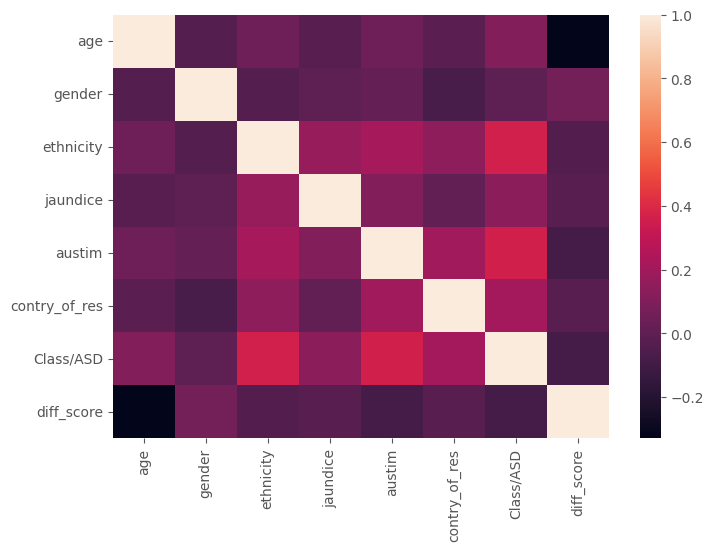

In [333]:
sns.heatmap(new_df.corr())

### Histogram Attributes

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'ethnicity'}>],
       [<Axes: title={'center': 'jaundice'}>,
        <Axes: title={'center': 'austim'}>,
        <Axes: title={'center': 'contry_of_res'}>],
       [<Axes: title={'center': 'Class/ASD'}>,
        <Axes: title={'center': 'diff_score'}>, <Axes: >]], dtype=object)

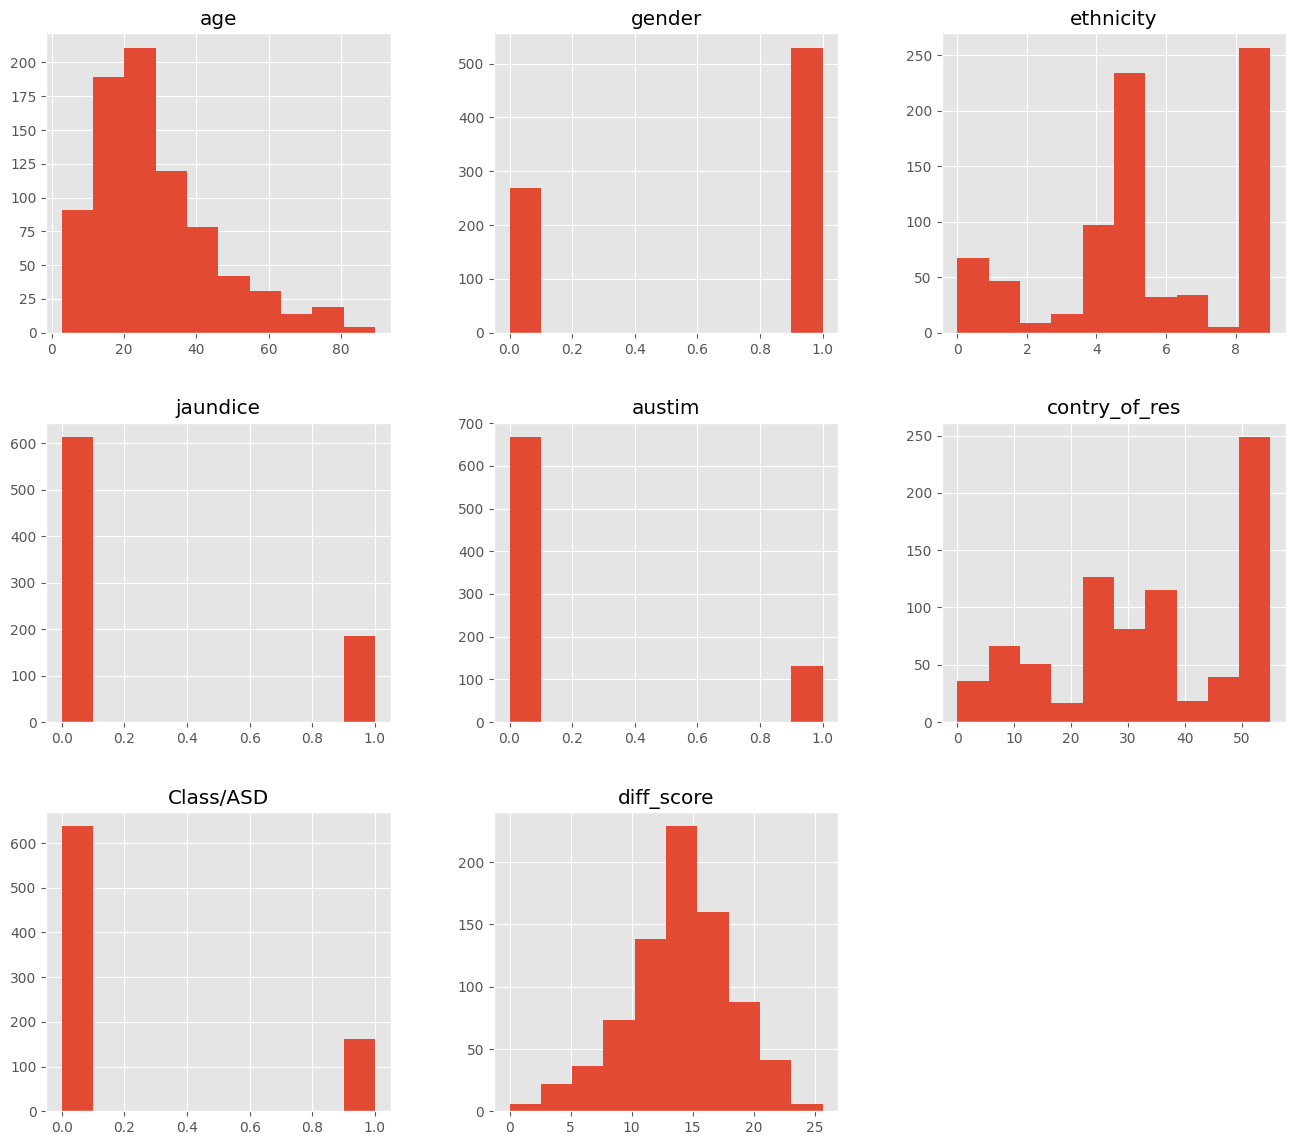

In [334]:
new_df.hist(figsize=(16, 14))

### Training Data Set

In [335]:
# partition: train/test = 80/20
attributes = [col for col in new_df.columns if col != "Class/ASD"]
train_x, test_x, train_y, test_y = train_test_split(new_df[attributes], new_df["Class/ASD"], test_size=0.2, random_state=500)

df_train_x = pd.DataFrame(train_x, columns=new_df.columns)
df_test_x = pd.DataFrame(test_x, columns=new_df.columns)
df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])

print ("shapes")
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

print 

print ("Class/ASD counts")
print (new_df["Class/ASD"].value_counts())
print (train_y.value_counts())
print (test_y.value_counts())

df_train_x = df_train_x.drop('Class/ASD', axis=1)
df_test_x = df_test_x.drop('Class/ASD', axis=1)
df_train_y = df_train_y.drop('Class/ASD', axis=1)
df_test_y = df_test_y.drop('Class/ASD', axis=1)

shapes
(639, 7)
(160, 7)
(639,)
(160,)
Class/ASD counts
Class/ASD
0    638
1    161
Name: count, dtype: int64
Class/ASD
0    508
1    131
Name: count, dtype: int64
Class/ASD
0    130
1     30
Name: count, dtype: int64


### Modeling

In [336]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.44
accuracy:0.825
precision:0.36666666666666664
recall:0.55


In [337]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
pred_y = rfc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.6
accuracy:0.875
precision:0.5
recall:0.75


In [338]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
pred_y = dtc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.36923076923076925
accuracy:0.74375
precision:0.4
recall:0.34285714285714286


In [339]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5423728813559322
accuracy:0.83125
precision:0.5333333333333333
recall:0.5517241379310345


In [340]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
pred_y = nbs.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5230769230769231
accuracy:0.80625
precision:0.5666666666666667
recall:0.4857142857142857


In [341]:
clf = LinearSVC()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.4230769230769231
accuracy:0.8125
precision:0.36666666666666664
recall:0.5


In [342]:
gnb = GaussianNB()
gnb.fit(train_x , train_y)
y_pred = gnb.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.4230769230769231
accuracy:0.8125
precision:0.36666666666666664
recall:0.5


### TensorFlow With Keras

In [343]:
attributes = [col for col in new_df.columns if col != "Class/ASD"]
train_x, test_x, train_y, test_y = train_test_split(new_df[attributes], new_df["Class/ASD"], test_size=0.2, random_state=123)
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=new_df.columns)
df_test_x = pd.DataFrame(test_x, columns=new_df.columns)
df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])

In [344]:
input_dim = train_x.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(5, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

In [345]:
history = model.fit(train_x, train_y,
                     epochs = 100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size = 5)

In [346]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 128}

In [347]:
history.history

{'accuracy': [0.7089201807975769,
  0.7777777910232544,
  0.7777777910232544,
  0.7840375304222107,
  0.7871674299240112,
  0.7902973294258118,
  0.7746478915214539,
  0.7793427109718323,
  0.7996870279312134,
  0.7902973294258118,
  0.7746478915214539,
  0.7918623089790344,
  0.7856025099754333,
  0.7965571284294128,
  0.7918623089790344,
  0.7934272289276123,
  0.7902973294258118,
  0.8012519478797913,
  0.7715179920196533,
  0.8028169274330139,
  0.7918623089790344,
  0.8153364658355713,
  0.7934272289276123,
  0.8043818473815918,
  0.7902973294258118,
  0.8075117468833923,
  0.8012519478797913,
  0.8028169274330139,
  0.8028169274330139,
  0.8122065663337708,
  0.7918623089790344,
  0.7996870279312134,
  0.8090766668319702,
  0.7809076905250549,
  0.7856025099754333,
  0.8012519478797913,
  0.8090766668319702,
  0.7949921488761902,
  0.7965571284294128,
  0.7934272289276123,
  0.7918623089790344,
  0.8106416463851929,
  0.8012519478797913,
  0.7981220483779907,
  0.7934272289276123

In [348]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

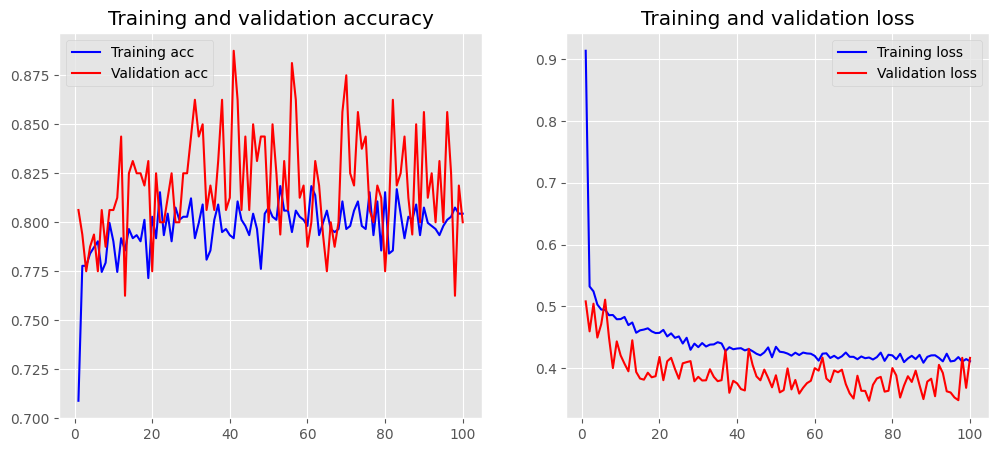

In [349]:
plot_history(history)

In [350]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7950
Testing Accuracy:  0.8000


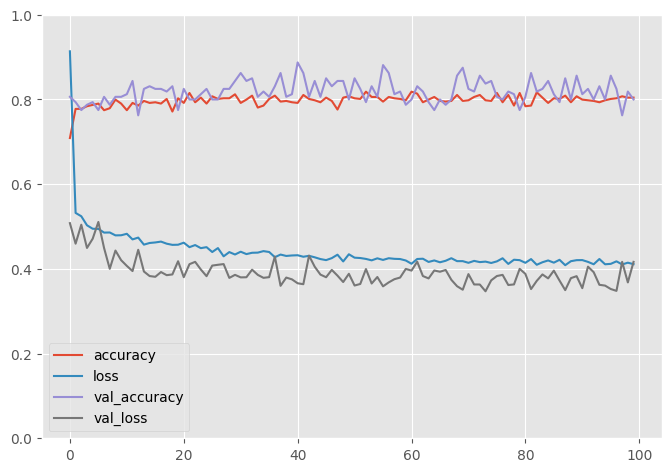

In [351]:
pd.DataFrame(history.history).plot(figsize=(8, 5.5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [352]:
train_x.shape

(639, 7)

In [353]:
train_y.shape

(639,)

In [354]:
X_valid, X_train = train_x[:266], train_x[266:]
y_valid, y_train = train_y[:266], train_y[266:]

In [355]:
history = model.fit(train_x, train_y,
                     epochs = 100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size = 5)

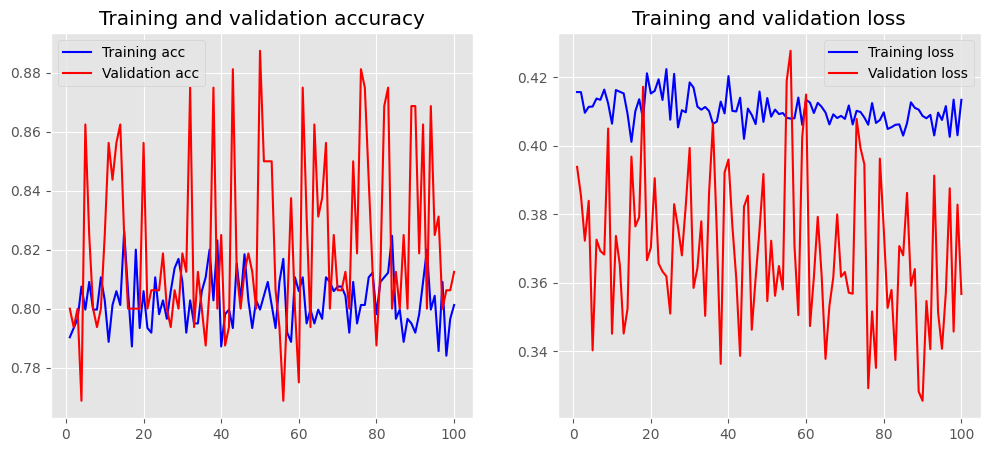

In [356]:
plot_history(history)

In [357]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8043
Testing Accuracy:  0.8125


In [358]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5
accuracy:0.85
precision:0.3870967741935484
recall:0.7058823529411765


In [359]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
pred_y = rfc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.47058823529411764
accuracy:0.83125
precision:0.3870967741935484
recall:0.6


In [360]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
pred_y = dtc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5277777777777778
accuracy:0.7875
precision:0.6129032258064516
recall:0.4634146341463415


In [361]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.6551724137931034
accuracy:0.875
precision:0.6129032258064516
recall:0.7037037037037037


In [362]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
pred_y = nbs.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5555555555555556
accuracy:0.85
precision:0.4838709677419355
recall:0.6521739130434783


In [363]:
clf = LinearSVC()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.4782608695652174
accuracy:0.85
precision:0.3548387096774194
recall:0.7333333333333333


In [364]:
gnb = GaussianNB()
gnb.fit(train_x , train_y)
y_pred = gnb.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.4782608695652174
accuracy:0.85
precision:0.3548387096774194
recall:0.7333333333333333


### Grid Search

In [ ]:
# Improved Cross-Validation and Grid Search Block with More Robustness and Reporting
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

attributes = [col for col in new_df.columns if col != "Class/ASD"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
f1 = []
precision = []
recall = []
accuracy = []
features = []
best_params = []
all_reports = []

for train_index, test_index in skf.split(new_df[attributes], new_df["Class/ASD"]):
    fold += 1
    print(f"Fold {fold}")
    # partition
    train_x, test_x = new_df.iloc[train_index], new_df.iloc[test_index]
    train_y, test_y = new_df["Class/ASD"].iloc[train_index], new_df["Class/ASD"].iloc[test_index]

    # Address class imbalance by upsampling minority class in training set
    train = train_x.copy()
    train['Class/ASD'] = train_y.values
    mode_val = train['Class/ASD'].mode().iloc[0]
    majority = train[train['Class/ASD'] == mode_val]
    minority = train[train['Class/ASD'] != mode_val]
    if len(minority) > 0 and len(majority) > 0:
        minority_upsampled = resample(minority, 
                                    replace=True, 
                                    n_samples=len(majority), 
                                    random_state=fold)
        train_upsampled = pd.concat([majority, minority_upsampled])
        train_x = train_upsampled[attributes]
        train_y = train_upsampled['Class/ASD']

    # convert numpy arrays to data frames
    df_train_x = pd.DataFrame(train_x, columns=new_df[attributes].columns)
    df_test_x = pd.DataFrame(test_x, columns=new_df[attributes].columns)
    df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"] )
    df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"] )

    # feature selection
    f_val, p_val = chi2(df_train_x, df_train_y["Class/ASD"] )
    df_scores = pd.DataFrame(zip(df_train_x.columns, f_val, p_val), columns=["feature", "chi2", "p"] )
    df_scores["chi2"] = df_scores["chi2"].round(2)
    df_scores["p"] = df_scores["p"].round(3)
    sel_ohe_cols = df_scores[df_scores["p"] < 0.05]["feature"].values

    # feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(df_train_x[sel_ohe_cols])
    X_test_scaled = scaler.transform(df_test_x[sel_ohe_cols])

    # train model with correct solver for l1/l2
    clf = LogisticRegression(solver='liblinear', random_state=fold, max_iter=1000)
    grid_values = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, .009, 0.01, .09, 1, 5, 10, 25]
    }
    grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring='f1', cv=3)
    grid_clf_acc.fit(X_train_scaled, train_y)

    # predict
    pred = grid_clf_acc.predict(X_test_scaled)

    # classification results
    report = metrics.classification_report(test_y, pred, output_dict=True)
    all_reports.append(report)
    print(metrics.classification_report(test_y, pred))
    f1.append(metrics.f1_score(test_y, pred))
    precision.append(metrics.precision_score(test_y, pred))
    recall.append(metrics.recall_score(test_y, pred))
    accuracy.append(metrics.accuracy_score(test_y, pred))
    best_params.append(grid_clf_acc.best_params_)

print("\nAverage F1: %.2f" % np.mean(f1))
print("Average precision: %.2f" % np.mean(precision))
print("Average recall: %.2f" % np.mean(recall))
print("Average accuracy: %.2f" % np.mean(accuracy))
print("Best params per fold:")
for i, params in enumerate(best_params):
    print(f"Fold {i+1}: {params}")

Fold 1


ValueError: cannot reindex on an axis with duplicate labels